In [1]:
#Konfigurasi & import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset dengan header baris ke-2

In [4]:
df = pd.read_excel("PPG-BP dataset.xlsx", header=1)

# Lihat kolom asli
print("Kolom asli:", df.columns.tolist())
print(df.head())

Kolom asli: ['Num.', 'subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)', 'Weight(kg)', 'Systolic Blood Pressure(mmHg)', 'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)', 'Hypertension', 'Diabetes', 'cerebral infarction', 'cerebrovascular disease']
   Num.  subject_ID Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0     1           2   Female         45         152          63   
1     2           3   Female         50         157          50   
2     3           6   Female         47         150          47   
3     4           8     Male         45         172          65   
4     5           9   Female         46         155          65   

   Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                            161                              89   
1                            160                              93   
2                            101                              71   
3                            136                          

In [5]:
#Rename kolom 

In [6]:
df.rename(columns={
    "Sex(M/F)": "sex",
    "Age(year)": "age",
    "Height(cm)": "height",
    "Weight(kg)": "weight",
    "Systolic Blood Pressure(mmHg)": "systolic",
    "Diastolic Blood Pressure(mmHg)": "diastolic",
    "Heart Rate(b/m)": "hr",
    "BMI(kg/m^2)": "bmi",
    "Hypertension": "hypertension"
}, inplace=True)

print("Kolom setelah rename:", df.columns.tolist())

Kolom setelah rename: ['Num.', 'subject_ID', 'sex', 'age', 'height', 'weight', 'systolic', 'diastolic', 'hr', 'bmi', 'hypertension', 'Diabetes', 'cerebral infarction', 'cerebrovascular disease']


In [7]:
#Konversi kategori ke numerik

In [8]:
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})

# Mapping label hipertensi (multi-class)
map_hyp = {"Normal": 0, "Prehypertension": 1, "Stage 1 hypertension": 2, "Stage 2 hypertension": 3}
df["hypertension"] = df["hypertension"].map(map_hyp)

print("Nilai unik sex:", df["sex"].unique())
print("Nilai unik hypertension:", df["hypertension"].unique())

Nilai unik sex: [1 0]
Nilai unik hypertension: [3 0 1 2]


In [9]:
print("Tipe data tiap kolom:")
print(df.dtypes)

print("\nPreview data:")
print(df.head())

Tipe data tiap kolom:
Num.                         int64
subject_ID                   int64
sex                          int64
age                          int64
height                       int64
weight                       int64
systolic                     int64
diastolic                    int64
hr                           int64
bmi                        float64
hypertension                 int64
Diabetes                    object
cerebral infarction         object
cerebrovascular disease     object
dtype: object

Preview data:
   Num.  subject_ID  sex  age  height  weight  systolic  diastolic  hr  \
0     1           2    1   45     152      63       161         89  97   
1     2           3    1   50     157      50       160         93  76   
2     3           6    1   47     150      47       101         71  79   
3     4           8    0   45     172      65       136         93  87   
4     5           9    1   46     155      65       123         73  73   

         bmi  

In [10]:
#Pilih fitur utama & target

In [11]:
X = df[["sex", "age", "height", "weight", "systolic", "diastolic", "hr", "bmi"]]
y = df["hypertension"]

print("Shape fitur:", X.shape)
print("Shape target:", y.shape)
print("\nPreview fitur:")
print(X.head())
print("\nPreview target:")
print(y.head())

Shape fitur: (219, 8)
Shape target: (219,)

Preview fitur:
   sex  age  height  weight  systolic  diastolic  hr        bmi
0    1   45     152      63       161         89  97  27.268006
1    1   50     157      50       160         93  76  20.284799
2    1   47     150      47       101         71  79  20.888889
3    0   45     172      65       136         93  87  21.971336
4    1   46     155      65       123         73  73  27.055151

Preview target:
0    3
1    3
2    0
3    1
4    1
Name: hypertension, dtype: int64


In [12]:
#Split data (train & test)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (175, 8)
Test size: (44, 8)


In [14]:
#KNN

In [15]:
#Normalisasi fitur KNN

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Contoh hasil normalisasi (train):")
print(X_train_scaled[:5])

Contoh hasil normalisasi (train):
[[0.         0.61538462 0.39215686 0.44776119 0.91176471 0.88135593
  0.68518519 0.41943932]
 [0.         0.36923077 0.45098039 0.49253731 0.3627451  0.44067797
  0.12962963 0.42843656]
 [1.         0.70769231 0.21568627 0.29850746 0.32352941 0.11864407
  0.16666667 0.36536276]
 [0.         0.38461538 0.39215686 0.29850746 0.35294118 0.13559322
  0.37037037 0.2581165 ]
 [0.         0.46153846 0.49019608 0.43283582 0.42156863 0.50847458
  0.37037037 0.34253187]]


In [17]:
#Modeling dengan KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Buat model KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
#Training KNN

In [20]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [21]:
#Prediksi KNN

In [22]:
y_pred_knn = knn.predict(X_test_scaled)

In [23]:
#Tuning KNN

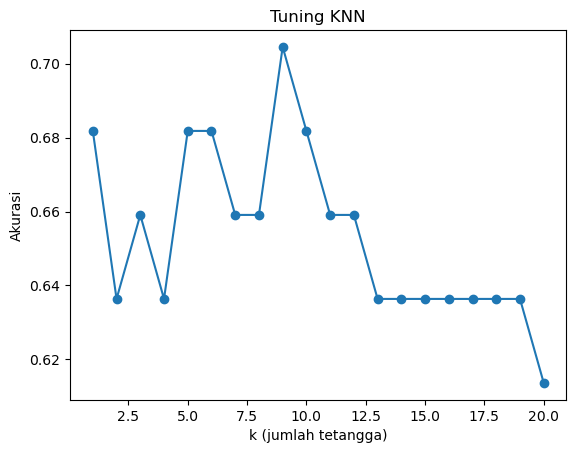

In [24]:
scores = []
for k in range(1, 21):  # coba k=1 sampai 20
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))

import matplotlib.pyplot as plt

plt.plot(range(1, 21), scores, marker='o')
plt.xlabel("k (jumlah tetangga)")
plt.ylabel("Akurasi")
plt.title("Tuning KNN")
plt.show()

In [25]:
#Evaluasi KNN

In [26]:
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Akurasi KNN:", acc_knn)
print("\nConfusion Matrix (KNN):\n", cm_knn)
print("\nClassification Report (KNN):\n", report_knn)

Akurasi KNN: 0.6818181818181818

Confusion Matrix (KNN):
 [[12  4  0  0]
 [ 3 12  2  0]
 [ 0  3  4  0]
 [ 0  1  1  2]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.60      0.71      0.65        17
           2       0.57      0.57      0.57         7
           3       1.00      0.50      0.67         4

    accuracy                           0.68        44
   macro avg       0.74      0.63      0.67        44
weighted avg       0.70      0.68      0.68        44



In [27]:
#ANN

In [28]:
#Normalisasi fitur ANN

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Normalisasi fitur (sudah ada scaler dari KNN, jadi kita pakai ulang)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#Modeling ANN MLP Classifier

In [31]:
ann = MLPClassifier(hidden_layer_sizes=(64, 32),   # 2 hidden layers: 64 dan 32 neuron
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    random_state=42)

In [32]:
#Training ANN

In [33]:
ann.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [34]:
#Prediksi ANN

In [35]:
y_pred_ann = ann.predict(X_test_scaled)

In [36]:
#Tuning ANN

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers (16,) -> Akurasi: 0.545
Hidden layers (32,) -> Akurasi: 0.727


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers (64,) -> Akurasi: 0.818


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layers (32, 16) -> Akurasi: 0.909
Hidden layers (64, 32) -> Akurasi: 0.932


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


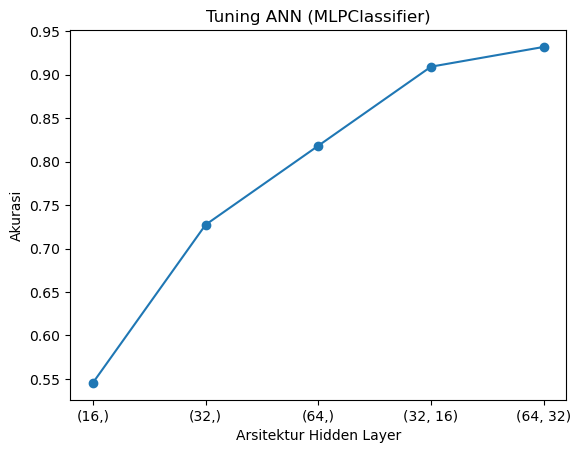

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

hidden_layer_options = [(16,), (32,), (64,), (32,16), (64,32)]
scores_ann = []

for hl in hidden_layer_options:
    model = MLPClassifier(hidden_layer_sizes=hl,
                          activation='relu',
                          solver='adam',
                          max_iter=500,
                          random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    scores_ann.append(acc)
    print(f"Hidden layers {hl} -> Akurasi: {acc:.3f}")

# Visualisasi
plt.plot([str(hl) for hl in hidden_layer_options], scores_ann, marker='o')
plt.xlabel("Arsitektur Hidden Layer")
plt.ylabel("Akurasi")
plt.title("Tuning ANN (MLPClassifier)")
plt.show()


In [38]:
#Evaluasi ANN

In [39]:
acc_ann = accuracy_score(y_test, y_pred_ann)
cm_ann = confusion_matrix(y_test, y_pred_ann)
report_ann = classification_report(y_test, y_pred_ann)

print("Akurasi ANN:", acc_ann)
print("\nConfusion Matrix (ANN):\n", cm_ann)
print("\nClassification Report (ANN):\n", report_ann)

Akurasi ANN: 0.9318181818181818

Confusion Matrix (ANN):
 [[15  1  0  0]
 [ 0 17  0  0]
 [ 0  1  6  0]
 [ 0  0  1  3]]

Classification Report (ANN):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.89      1.00      0.94        17
           2       0.86      0.86      0.86         7
           3       1.00      0.75      0.86         4

    accuracy                           0.93        44
   macro avg       0.94      0.89      0.91        44
weighted avg       0.94      0.93      0.93        44



In [40]:
#Prediksi hipertensi 

In [41]:
# ("sex", "age", "height", "weight", "systolic", "diastolic", "heart_rate", "bmi")
pasien_baru = [[0, 40, 170, 65, 130, 85, 78, 22.5]]  

pasien_baru_df = pd.DataFrame(
    pasien_baru,
    columns=["sex", "age", "height", "weight", "systolic", "diastolic", "hr", "bmi"]
)

# Scale
pasien_baru_scaled = scaler.transform(pasien_baru_df)

# Prediksi dengan KNN
prediksi_knn = knn.predict(pasien_baru_scaled)

# Prediksi dengan ANN
prediksi_ann = ann.predict(pasien_baru_scaled)

print("Input pasien baru:")
print(pasien_baru_df)
print("Hasil deteksi KNN :", prediksi_knn[0])
print("Hasil deteksi ANN :", prediksi_ann[0])


Input pasien baru:
   sex  age  height  weight  systolic  diastolic  hr   bmi
0    0   40     170      65       130         85  78  22.5
Hasil deteksi KNN : 1
Hasil deteksi ANN : 1


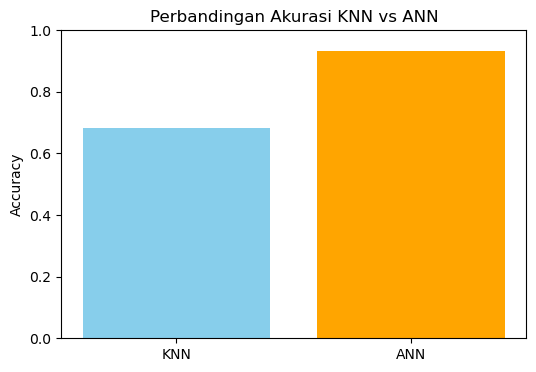

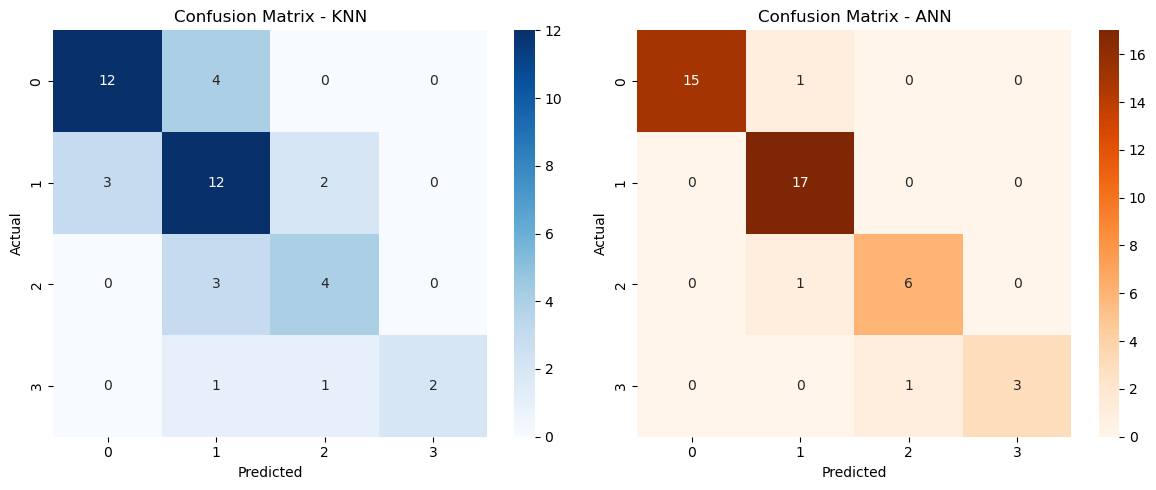

In [42]:
akurasi = {
    "KNN": acc_knn,
    "ANN": acc_ann
}

plt.figure(figsize=(6,4))
plt.bar(akurasi.keys(), akurasi.values(), color=["skyblue", "orange"])
plt.title("Perbandingan Akurasi KNN vs ANN")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# Confusion Matrix Side-by-Side

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - KNN")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix - ANN")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

          Model  Akurasi
0           KNN    0.680
1     ANN (16,)    0.545
2     ANN (32,)    0.727
3     ANN (64,)    0.818
4  ANN (32, 16)    0.909
5  ANN (64, 32)    0.932


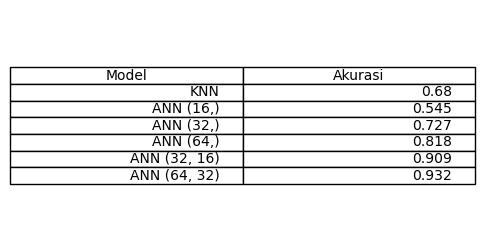

In [43]:
import pandas as pd

# Data dummy (ganti dengan hasil akurasimu)
acc_knn = 0.68
hidden_layer_list = [(16,), (32,), (64,), (32,16), (64,32)]
akurasi_ann = [0.545, 0.727, 0.818, 0.909, 0.932]

# Buat tabel ANN
df_ann = pd.DataFrame({
    "Model": [f"ANN {hl}" for hl in hidden_layer_list],
    "Akurasi": akurasi_ann
})

# Gabung dengan KNN
df_knn = pd.DataFrame({
    "Model": ["KNN"],
    "Akurasi": [acc_knn]
})

# Satukan semua
df_compare = pd.concat([df_knn, df_ann], ignore_index=True)

# Tampilkan tabel
print(df_compare)

# Kalau ingin visual tabel lebih rapi di Jupyter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,3))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df_compare.values,
    colLabels=df_compare.columns,
    loc='center'
)
plt.show()
